In [37]:
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns

from tqdm import tqdm

In [38]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [39]:
def unit_stats(x):
    df = {}
    idx = ['edu', 'age']
    unit = 2
    
    df['unit' + '_speed'] = x['game_log_speed'].mean() * (2-x['game_log_success'].mean()/100) \
                                                                    + (1-x['game_log_level'].mean()/10)
    df['edu'] = x.iloc[0]['education']
    df['age'] = x.iloc[0]['age']
    df['unit' + '_level'] = x['game_log_level'].mean()
    
    idx.append('unit' +  '_speed')
#     idx.append('unit' + str(unit) + '_score')
    idx.append('unit' + '_level')
    return pd.Series(df, index = idx)

In [40]:
def six_categoric(x, title):
    x_order=['High_Edu/66-75', 'High_Edu/76-80', 'High_Edu/81-97', 'Low_Edu/66-75', 'Low_Edu/76-80', 'Low_Edu/81-97']
    
    game_log = pd.read_csv("../game_log.csv", encoding='utf-8-sig', index_col='game_log_idx')
    unit_df = [game_log[game_log['unit']==n ] for n in x]
    unit = pd.concat(unit_df)

    unit_log = unit.groupby(['user_idx']).apply(unit_stats)
    unit_log.loc[unit_log['edu'] >= 7, 'Edu_Category'] = "High_Edu"
    unit_log.loc[unit_log['edu'] < 7, 'Edu_Category'] = "Low_Edu"
    unit_log.loc[(unit_log['age']>75) & (unit_log['age']<81), 'Age_Category'] = "76-80"
    unit_log.loc[(unit_log['age']>80), 'Age_Category'] = "81-97"
    unit_log.loc[unit_log['age']<76, 'Age_Category'] = "66-75"
    unit_log['Category'] = [n[1]['Edu_Category']+'/'+n[1]['Age_Category'] for n in unit_log[['Edu_Category', 'Age_Category']].iterrows()]

    low_edu_min_age = unit_log.loc[unit_log['Edu_Category']=='Low_Edu', 'age'].min()
    unit_log_over65 = unit_log[unit_log['age']>low_edu_min_age]
    unit_log = unit_log_over65
    
    speed_over100_idx = unit_log[unit_log['unit_speed'] > 100].index
    unit_log = unit_log.drop(speed_over100_idx)
    
    print(unit_log['Category'].value_counts())
    
    plt.figure(figsize=(12,10))
    plt.title(title, fontsize=25)
    plt.ylabel('Speed')
    sns.boxplot(unit_log['Category'], unit_log['unit_speed'], order=x_order, showfliers=False)
    plt.show()
    
    plt.figure(figsize=(12,10))
    plt.title(title, fontsize=25)
    plt.ylabel('Speed')
    sns.boxplot(unit_log['Category'], unit_log['unit_level'], order=x_order, showfliers=False)
    plt.show()

High_Edu/76-80    119
High_Edu/66-75    111
High_Edu/81-97     81
Low_Edu/66-75      38
Low_Edu/76-80      32
Low_Edu/81-97      29
Name: Category, dtype: int64


C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


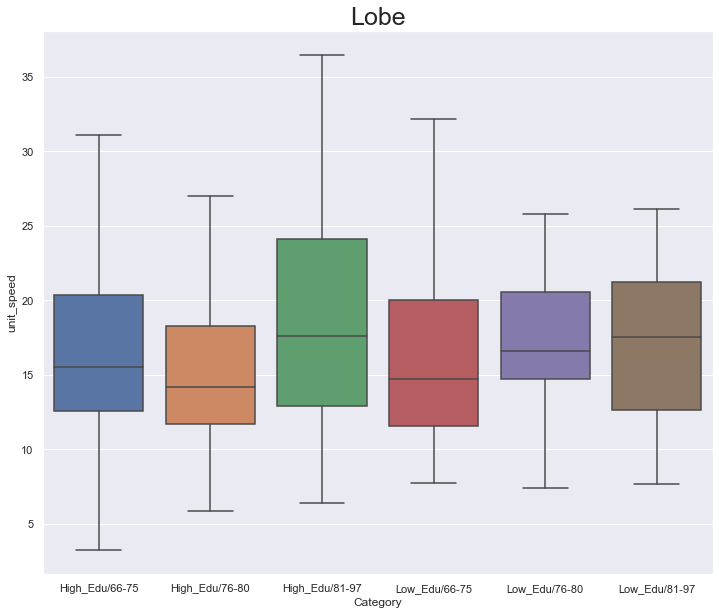

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


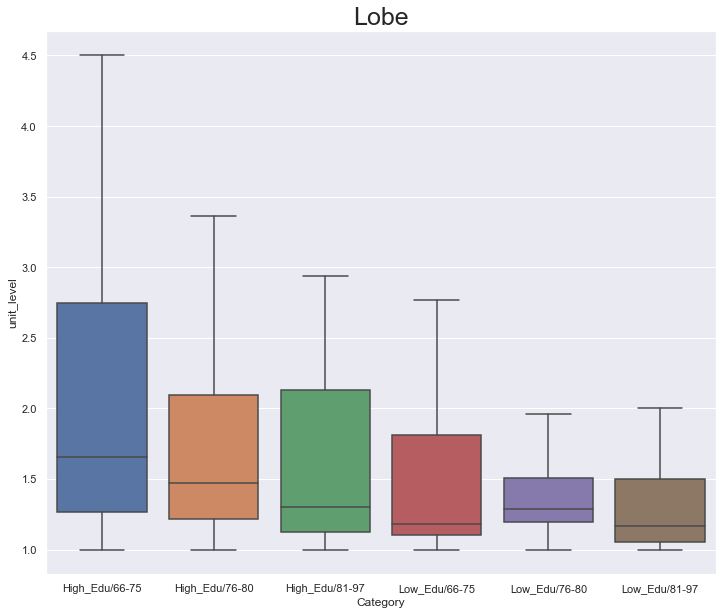

In [41]:
x = [1,2,4,7,8,9,10,11,12,13]
six_categoric(x, 'Lobe')

High_Edu/76-80    121
High_Edu/66-75    111
High_Edu/81-97     85
Low_Edu/66-75      41
Low_Edu/76-80      32
Low_Edu/81-97      30
Name: Category, dtype: int64


C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


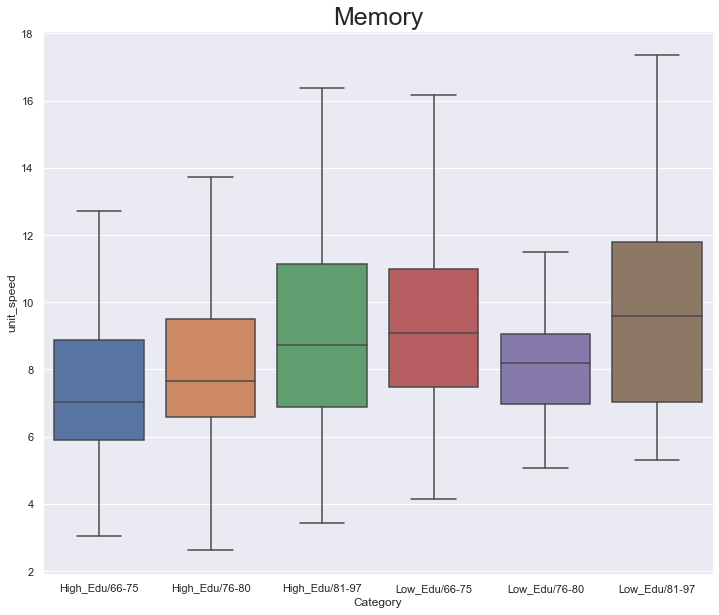

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


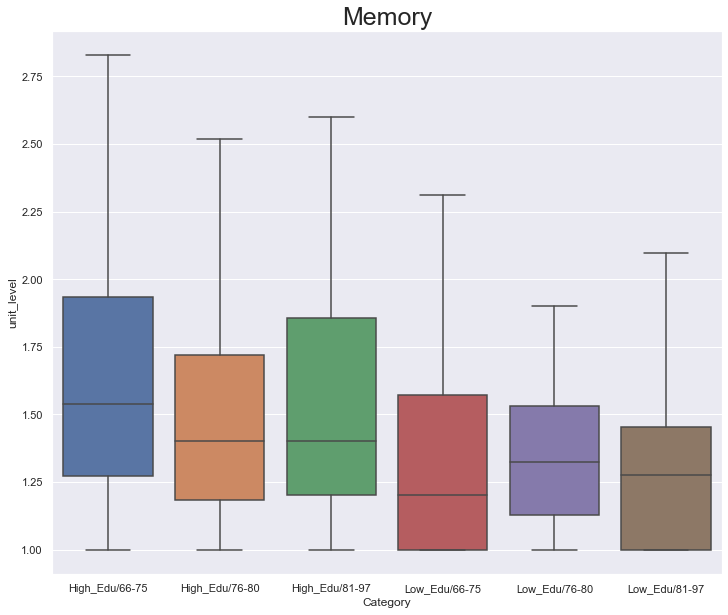

In [42]:
x = [3, 5, 6]
six_categoric(x, 'Memory')

High_Edu/76-80    119
High_Edu/66-75    111
High_Edu/81-97     83
Low_Edu/66-75      41
Low_Edu/76-80      31
Low_Edu/81-97      30
Name: Category, dtype: int64


C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


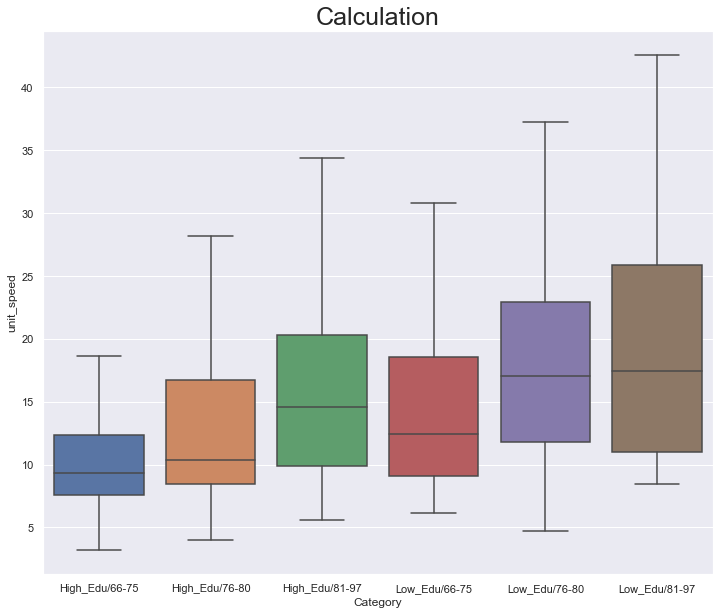

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


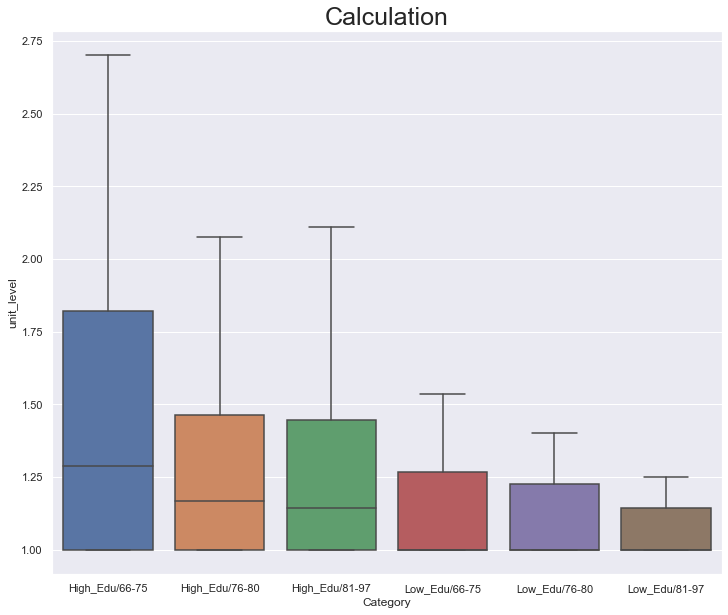

In [43]:
x = [17, 18, 19, 20]
six_categoric(x, 'Calculation')

High_Edu/76-80    116
High_Edu/66-75    109
High_Edu/81-97     75
Low_Edu/66-75      37
Low_Edu/76-80      31
Low_Edu/81-97      27
Name: Category, dtype: int64


C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


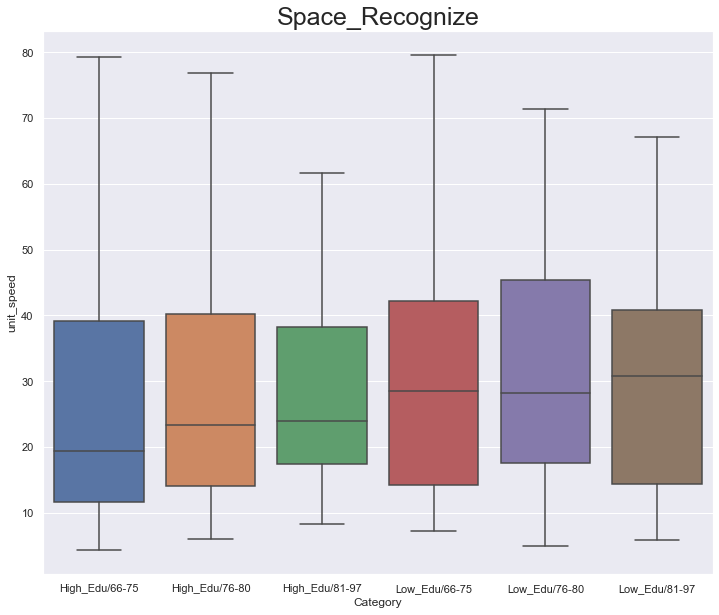

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


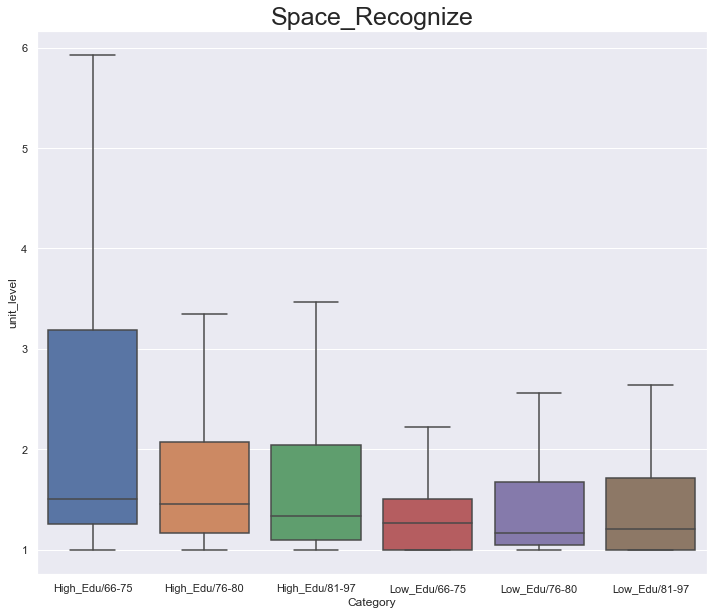

In [44]:
x = [14, 16, 15, 22]
six_categoric(x, 'Space_Recognize')